# 4. 뉴스 카테고리 다중분류

## 라이브러리 버전을 확인해 봅니다

In [46]:
import tensorflow
import matplotlib
import seaborn 
import numpy 
import pandas
import sklearn

print(tensorflow.__version__)
print(matplotlib.__version__)
print(seaborn.__version__)
print(numpy.__version__)
print(pandas.__version__)
print(sklearn.__version__)

2.6.0
3.4.3
0.11.2
1.21.4
1.3.3
1.0


# Case 1. 모든 단어 사용

In [47]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=None, test_split=0.2)

In [48]:
print('훈련 샘플의 수: {}'.format(len(x_train)))
print('테스트 샘플의 수: {}'.format(len(x_test)))

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


In [49]:
print(x_train[0])
print(x_test[0])

[1, 27595, 28842, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
[1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 18292, 159, 9, 1084, 363, 13, 19231, 71, 9, 16273, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 16273, 7, 748, 48, 9, 19231, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2280, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 1214, 23, 644, 47, 20, 324, 27, 56, 23406, 28185, 5, 192,

In [50]:
print(y_train[0])
print(y_test[0])

3
3


In [51]:
num_classes = max(y_train) + 1       # 레이블이 0부터 시작하기에 갯수를 확인하기 위해서는 1을 더함
print('클래스의 수 : {}'.format(num_classes))

클래스의 수 : 46


훈련용 뉴스의 최대 길이 :2376
훈련용 뉴스의 평균 길이 :145.5398574927633


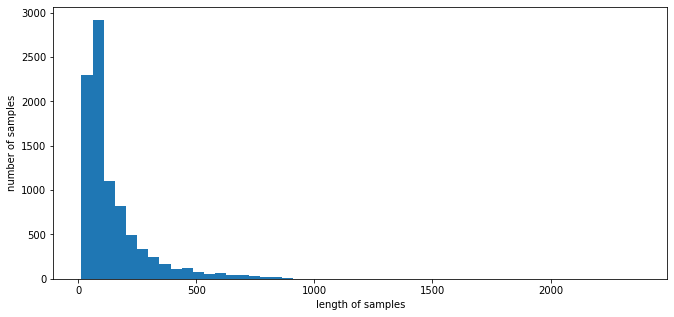

In [52]:
print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in x_train)))
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, x_train))/len(x_train)))

plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

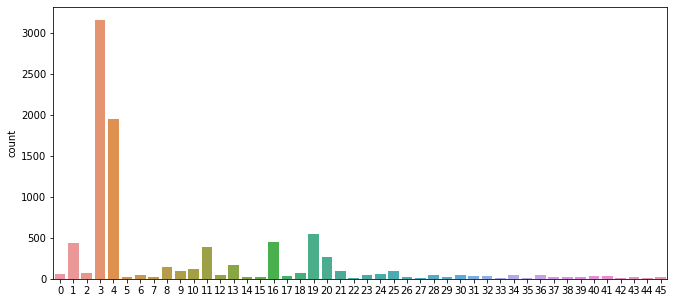

In [53]:
fig, axe = plt.subplots(ncols=1)

fig.set_size_inches(11,5)
sns.countplot(x=y_train)

plt.show()

In [54]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True) # return_counts가 True이면 각 고유 값의 개수 배열을 반환
print("각 클래스 빈도수:")
print(np.asarray((unique_elements, counts_elements)))

각 클래스 빈도수:
[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45]
 [  55  432   74 3159 1949   17   48   16  139  101  124  390   49  172
    26   20  444   39   66  549  269  100   15   41   62   92   24   15
    48   19   45   39   32   11   50   10   49   19   19   24   36   30
    13   21   12   18]]


## 2) 데이터 복원하기


In [55]:
word_index = reuters.get_word_index(path="reuters_word_index.json")
print('=3')

=3


In [56]:
word_index['the']

1

In [57]:
word_index['it']

13

In [58]:
index_to_word = { index+3 : word for word, index in word_index.items() }
print('=3')

=3


In [59]:
print(index_to_word[4])
print(index_to_word[16])

the
it


In [60]:
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index]=token
print('=3')

=3


In [61]:
print(' '.join([index_to_word[index] for index in x_train[0]]))

<sos> mcgrath rentcorp said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [62]:
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded
print(len(x_train))

8982


In [63]:
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded
print(len(x_test))

2246


In [64]:
x_train[:5]

['<sos> mcgrath rentcorp said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3',
 "<sos> generale de banque sa lt genb br and lt heller overseas corp of chicago have each taken 50 pct stakes in factoring company sa belgo factors generale de banque said in a statement it gave no financial details of the transaction sa belgo factors' turnover in 1986 was 17 5 billion belgian francs reuter 3",
 '<sos> shr 3 28 dlrs vs 22 cts shr diluted 2 99 dlrs vs 22 cts net 46 0 mln vs 3 328 000 avg shrs 14 0 mln vs 15 2 mln year shr 5 41 dlrs vs 1 56 dlrs shr diluted 4 94 dlrs vs 1 50 dlrs net 78 2 mln vs 25 9 mln avg shrs 14 5 mln vs 15 1 mln note earnings per share reflect th

In [65]:
x_test[:5]

['<sos> the great atlantic and pacific tea co said its three year 345 mln dlr capital program will be be substantially increased to accommodate growth and expansion plans for waldbaum inc and shopwell inc over the next two years a and p said the acquisition of shopwell in august 1986 and waldbaum in december helped us achieve better than expected results in the fourth quarter ended february 28 its net income from continuing operations jumped 52 6 pct to 20 7 mln dlrs or 55 cts a share in the latest quarter as sales increased 48 3 pct to 1 58 billion dlrs a and p gave no details on the expanded capital program but it did say it completed the first year of the program during 1986 a and p is 52 4 pct owned by lt tengelmann warenhandelsgesellschaft of west germany reuter 3',
 "<sos> philippine sugar production in the 1987 88 crop year ending august has been set at 1 6 mln tonnes up from a provisional 1 3 mln tonnes this year sugar regulatory administration sra chairman arsenio yulo said yu

## 3) 벡터화하기


In [66]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
print('=3')

=3


In [67]:
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

(8982, 26506)


In [68]:
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 26506)


## 4) 머신러닝 모델 학습
- 나이브 베이즈 분류기
- CNB (Complement Naive Bayes Classifier)
- 로지스틱 회귀 (Logistic Regression)
- 선형 서포트 벡터 머신 (Linear Support Vector Machine)
- 결정 트리 (Decision Tree)
- 랜덤 포레스트 (Random Forest)
- 그래디언트 부스팅 트리 (Gradient Boosting Classifier)
- 보팅 (Voting)

### 4.1) 나이브 베이즈 분류기


In [69]:
from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score #정확도 계산

print('=3')

=3


In [70]:
model = MultinomialNB()
model.fit(tfidfv, y_train)

MultinomialNB()

In [71]:
x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환
print(tfidfv_test.shape)

(2246, 26506)


In [72]:
predicted = model.predict(tfidfv_test)           # 테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted))      # 예측값과 실제값 비교

정확도: 0.5997328584149599


In [73]:
x_test[3]

'<sos> graham mccormick oil and gas partnership said it completed the sale of interests in two major oil and gas fields to lt energy assets international corp for 21 mln dlrs the company said it sold about one half of its 50 pct interest in the oak hill and north rucias fields its two largest producing properties it said it used about 20 mln dlrs of the proceeds to prepay principal on its senior secured notes semi annual principal payments on the remaining 40 mln dlrs of notes have been satisfied until december 1988 as a result it said the company said the note agreements were amended to reflect an easing of some financial covenants and an increase of interest to 13 5 pct from 13 0 pct until december 1990 it said the noteholders exercise price for 1 125 000 warrants was also reduced to 50 cts from 1 50 dlrs the company said energy assets agreed to share the costs of increasing production at the oak hill field reuter 3'

In [74]:
y_test[3]

4

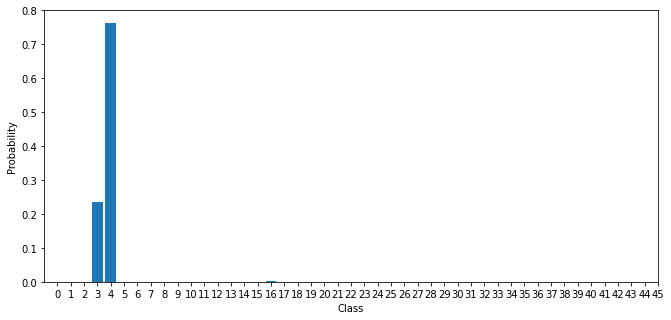

In [75]:
probability_3 = model.predict_proba(tfidfv_test[3])[0]

plt.rcParams["figure.figsize"] = (11,5)
plt.bar(model.classes_, probability_3)
plt.xlim(-1, 21)
plt.xticks(model.classes_)
plt.xlabel("Class")
plt.ylabel("Probability")
plt.show()

In [76]:
model.predict(tfidfv_test[3])

array([4])

### 4.2) CNB

In [77]:
cb = ComplementNB()
cb.fit(tfidfv, y_train)

ComplementNB()

In [78]:
predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7649154051647373


### 4.3) 로지스틱 회귀

In [79]:
lr = LogisticRegression(C=10000, penalty='l2')
lr.fit(tfidfv, y_train)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10000)

In [80]:
predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.813446126447017


### 4.4) 선형 서포트 벡터 머신

In [81]:
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=500, dual=False)
lsvc.fit(tfidfv, y_train)

/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=1000, dual=False, max_iter=500, penalty='l1')

In [82]:
predicted = lsvc.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7804986642920748


### 4.5) 결정 트리

In [83]:
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)

DecisionTreeClassifier(max_depth=10, random_state=0)

In [84]:
predicted = tree.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.6211041852181657


### 4.6) 랜덤 포레스트

In [85]:
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(tfidfv, y_train)

RandomForestClassifier(n_estimators=5, random_state=0)

In [86]:
predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.6544968833481746


### 4.7) 그래디언트 부스팅 트리

In [87]:
grbt = GradientBoostingClassifier(random_state=0) # verbose=3
grbt.fit(tfidfv, y_train)

GradientBoostingClassifier(random_state=0)

In [88]:
predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7702582368655387


### 4.8) 보팅

In [89]:
voting_classifier = VotingClassifier(estimators=[
         ('lr', LogisticRegression(C=10000, penalty='l2')),
        ('cb', ComplementNB()),
        ('grbt', GradientBoostingClassifier(random_state=0))
], voting='soft', n_jobs=-1)
voting_classifier.fit(tfidfv, y_train)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('lr', LogisticRegression(C=10000)),
                             ('cb', ComplementNB()),
                             ('grbt',
                              GradientBoostingClassifier(random_state=0))],
                 n_jobs=-1, voting='soft')

In [90]:
predicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.8187889581478184


# Case 2. 빈도수 상위 5,000개의 단어 사용
## 1) 데이터 로드하기

In [91]:
(x_train_5k, y_train_5k), (x_test_5k, y_test_5k) = reuters.load_data(num_words=5000, test_split=0.2)

In [92]:
print('훈련 샘플의 수: {}'.format(len(x_train_5k)))
print('테스트 샘플의 수: {}'.format(len(x_test_5k)))

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


## 2) 데이터 복원하기

In [93]:
decoded = []
for i in range(len(x_train_5k)):
    t = ' '.join([index_to_word[index] for index in x_train_5k[i]])
    decoded.append(t)

x_train_5k = decoded
print(len(x_train_5k))

8982


In [94]:
decoded = []
for i in range(len(x_test_5k)):
    t = ' '.join([index_to_word[index] for index in x_test_5k[i]])
    decoded.append(t)

x_test_5k = decoded
print(len(x_test_5k))

2246


## 3) 벡터화하기

In [95]:
dtmvector = CountVectorizer()
x_train_5k_dtm = dtmvector.fit_transform(x_train_5k)
print(x_train_5k_dtm.shape)

(8982, 4867)


In [96]:
tfidf_transformer = TfidfTransformer()
tfidfv_5k = tfidf_transformer.fit_transform(x_train_5k_dtm)
print(tfidfv_5k.shape)

(8982, 4867)


In [97]:
x_test_5k_dtm = dtmvector.transform(x_test_5k) #테스트 데이터를 DTM으로 변환
tfidfv_5k_test = tfidf_transformer.transform(x_test_5k_dtm) #DTM을 TF-IDF 행렬로 변환
print(tfidfv_5k_test.shape)

(2246, 4867)


## 4) 머신러닝 모델 학습

In [98]:
def ml_model(tfidfv, y_train, tfidfv_test, y_test):
    # 나이브 베이즈 분류기
    nb = MultinomialNB()
    nb.fit(tfidfv, y_train)
    nb_predicted = nb.predict(tfidfv_test)      # 테스트 데이터에 대한 예측
    print('나이브 베이즈 분류기 정확도 : ', accuracy_score(y_test, nb_predicted))   # 예측값과 실제값 비교

    # CNB
    cb = ComplementNB()
    cb.fit(tfidfv, y_train)
    cb_predicted = cb.predict(tfidfv_test)
    print("CNB 정확도:", accuracy_score(y_test, cb_predicted))

    # 로지스틱 회귀
    lr = LogisticRegression(C=10000, penalty='l2')
    lr.fit(tfidfv, y_train)
    lr_predicted = lr.predict(tfidfv_test)
    print("로지스틱 회귀 정확도:", accuracy_score(y_test, lr_predicted))

    # LSVM
    lsvc = LinearSVC(C=1000, penalty='l1', max_iter=500, dual=False)
    lsvc.fit(tfidfv, y_train)
    lsvc_predicted = lsvc.predict(tfidfv_test)
    print("LSVM 정확도:", accuracy_score(y_test, lsvc_predicted))

    # 결정 트리
    tree = DecisionTreeClassifier(max_depth=10, random_state=0)
    tree.fit(tfidfv, y_train)
    tree_predicted = tree.predict(tfidfv_test)
    print("결정 트리 정확도:", accuracy_score(y_test, tree_predicted))

    # 랜덤 포레스트
    forest = RandomForestClassifier(n_estimators=5, random_state=0)
    forest.fit(tfidfv, y_train)
    forest_predicted = forest.predict(tfidfv_test)
    print("랜덤 포레스트 정확도:", accuracy_score(y_test, forest_predicted))

    # 그래디언트 부스팅 트리
    grbt = GradientBoostingClassifier(random_state=0)
    grbt.fit(tfidfv, y_train)
    grbt_predicted = grbt.predict(tfidfv_test)
    print("그래디언트 부스팅 트리 정확도:", accuracy_score(y_test, grbt_predicted))

    # 보팅
    voting_classifier = VotingClassifier(estimators=[
                                                     ('lr', LogisticRegression(C=10000, penalty='l2')),
                                                     ('cb', ComplementNB()),
                                                     ('grbt', GradientBoostingClassifier(random_state=0))
                                                     ], voting='soft', n_jobs=-1)
    voting_classifier.fit(tfidfv, y_train)
    voting_predicted = voting_classifier.predict(tfidfv_test)
    print("보팅 정확도:", accuracy_score(y_test, voting_predicted))

    return nb, cb, lr, lsvc, tree, forest, grbt, voting_classifier

In [99]:
nb_5k, cb_5k, lr_5k, lsvc_5k, tree_5k, forest_5k, grbt_5k, voting_classifier_5k = ml_model(tfidfv_5k, y_train_5k, tfidfv_5k_test, y_test_5k)

나이브 베이즈 분류기 정확도 :  0.6731967943009796
CNB 정확도: 0.7707034728406055


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


로지스틱 회귀 정확도: 0.8058771148708815


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LSVM 정확도: 0.7658058771148709
결정 트리 정확도: 0.6179875333926982
랜덤 포레스트 정확도: 0.701246660730187
그래디언트 부스팅 트리 정확도: 0.767586821015138


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


보팅 정확도: 0.8161175422974176


# Case 3. 빈도수 상위 15,000개의 단어만 사용

In [100]:
(x_train_15k, y_train_15k), (x_test_15k, y_test_15k) = reuters.load_data(num_words=15000, test_split=0.2)

In [101]:
print('훈련 샘플의 수: {}'.format(len(x_train_15k)))
print('테스트 샘플의 수: {}'.format(len(x_test_15k)))

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


## 2) 데이터 복원하기

In [102]:
decoded = []
for i in range(len(x_train_15k)):
    t = ' '.join([index_to_word[index] for index in x_train_15k[i]])
    decoded.append(t)

x_train_15k = decoded
print(len(x_train_15k))

8982


In [103]:
decoded = []
for i in range(len(x_test_15k)):
    t = ' '.join([index_to_word[index] for index in x_test_15k[i]])
    decoded.append(t)

x_test_15k = decoded
print(len(x_test_15k))

2246


## 3) 벡터화하기

In [104]:
dtmvector = CountVectorizer()
x_train_15k_dtm = dtmvector.fit_transform(x_train_15k)
print(x_train_15k_dtm.shape)

(8982, 14227)


In [105]:
tfidf_transformer = TfidfTransformer()
tfidfv_15k = tfidf_transformer.fit_transform(x_train_15k_dtm)
print(tfidfv_15k.shape)

(8982, 14227)


In [106]:
x_test_15k_dtm = dtmvector.transform(x_test_15k) #테스트 데이터를 DTM으로 변환
tfidfv_15k_test = tfidf_transformer.transform(x_test_15k_dtm) #DTM을 TF-IDF 행렬로 변환
print(tfidfv_15k_test.shape)

(2246, 14227)


## 4) 머신러닝 모델 학습

In [107]:
nb_15k, cb_15k, lr_15k, lsvc_15k, tree_15k, forest_15k, grbt_15k, voting_classifier_15k = ml_model(tfidfv_15k, y_train_15k, tfidfv_15k_test, y_test_15k)

나이브 베이즈 분류기 정확도 :  0.6331255565449688
CNB 정확도: 0.7720391807658059


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


로지스틱 회귀 정확도: 0.8125556544968834


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LSVM 정확도: 0.7729296527159395
결정 트리 정확도: 0.6193232413178985
랜덤 포레스트 정확도: 0.6714158504007124
그래디언트 부스팅 트리 정확도: 0.7707034728406055


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


보팅 정확도: 0.8165627782724845


# Case 4. 빈도수 상위 20,000개의 단어만 사용
## 1) 데이터 로드하기

In [108]:
(x_train_20k, y_train_20k), (x_test_20k, y_test_20k) = reuters.load_data(num_words=20000, test_split=0.2)

## 2) 데이터 복원하기

In [109]:
decoded = []
for i in range(len(x_train_20k)):
    t = ' '.join([index_to_word[index] for index in x_train_20k[i]])
    decoded.append(t)

x_train_20k = decoded
print(len(x_train_20k))

8982


In [110]:
decoded = []
for i in range(len(x_test_20k)):
    t = ' '.join([index_to_word[index] for index in x_test_20k[i]])
    decoded.append(t)

x_test_20k = decoded
print(len(x_test_20k))

2246


## 3) 벡터화하기

In [111]:
dtmvector = CountVectorizer()
x_train_20k_dtm = dtmvector.fit_transform(x_train_20k)
print(x_train_20k_dtm.shape)

(8982, 18479)


In [112]:
tfidf_transformer = TfidfTransformer()
tfidfv_20k = tfidf_transformer.fit_transform(x_train_20k_dtm)
print(tfidfv_20k.shape)

(8982, 18479)


In [113]:
x_test_20k_dtm = dtmvector.transform(x_test_20k) #테스트 데이터를 DTM으로 변환
tfidfv_20k_test = tfidf_transformer.transform(x_test_20k_dtm) #DTM을 TF-IDF 행렬로 변환
print(tfidfv_20k_test.shape)

(2246, 18479)


## 4) 머신러닝 모델 학습

In [114]:
nb_20k, cb_20k, lr_20k, lsvc_20k, tree_20k, forest_20k, grbt_20k, voting_classifier_20k = ml_model(tfidfv_20k, y_train_20k, tfidfv_20k_test, y_test_20k)

나이브 베이즈 분류기 정확도 :  0.6193232413178985
CNB 정확도: 0.7671415850400712


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


로지스틱 회귀 정확도: 0.8098842386464826


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LSVM 정확도: 0.7845057880676759
결정 트리 정확도: 0.6211041852181657
랜덤 포레스트 정확도: 0.6714158504007124
그래디언트 부스팅 트리 정확도: 0.7702582368655387


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


보팅 정확도: 0.8178984861976848


# 딥러닝 모델 학습 (RNN 모델)

In [115]:
import tensorflow as tf

In [116]:
vocab_size = 20000   # 단어사진 크기
word_vector_dim = 32  # 단어 하나를 표현하는 임베딩 벡터의 차원수 (변경 가능한 하이퍼파라마터)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim))
model.add(tf.keras.layers.LSTM(32))  # LSTM 레이어 사용 & LSTM 벡터의 차원 수 변경 가능
model.add(tf.keras.layers.Dense(8, activation = 'relu'))
model.add(tf.keras.layers.Dense(num_classes, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          640000    
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dense (Dense)                (None, 8)                 264       
_________________________________________________________________
dense_1 (Dense)              (None, 46)                414       
Total params: 648,998
Trainable params: 648,998
Non-trainable params: 0
_________________________________________________________________


In [117]:
print(tfidfv_20k.shape)
print(y_train_20k.shape)

(8982, 18479)
(8982,)


In [118]:
from sklearn.model_selection import train_test_split

tfidfv_20k, tfidfv_20k_val, y_train_20k, y_val_20k = train_test_split(tfidfv_20k, y_train_20k, test_size = 0.2)

In [119]:
print(tfidfv_20k.shape)
print(y_train_20k.shape)

(7185, 18479)
(7185,)


In [120]:
print(tfidfv_20k_val.shape)
print(y_val_20k.shape)

(1797, 18479)
(1797,)


In [121]:
tfidfv_20k

<7185x18479 sparse matrix of type '<class 'numpy.float64'>'
	with 562598 stored elements in Compressed Sparse Row format>

In [122]:
tfidfv_20k_arr = tfidfv_20k.toarray()
tfidfv_20k_val_arr = tfidfv_20k_val.toarray()
tfidfv_20k_test_arr = tfidfv_20k_test.toarray()

In [123]:
tfidfv_20k_arr

array([[0.        , 0.21693844, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.05459193, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.22978547, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.07952671, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [124]:
from tensorflow.keras.callbacks import EarlyStopping

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

epochs = 10

es = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

history = model.fit(tfidfv_20k_arr,
                    y_train_20k,
                    epochs = epochs,
                    batch_size = 64,
                    callbacks=[es],
                    validation_data = (tfidfv_20k_val_arr, y_val_20k),
                    verbose=1)

Epoch 1/10
113/113 [==============================] - 75s 443ms/step - loss: 3.0038 - accuracy: 0.2562 - val_loss: 2.5136 - val_accuracy: 0.3550
Epoch 2/10
113/113 [==============================] - 49s 435ms/step - loss: 2.4527 - accuracy: 0.3509 - val_loss: 2.4396 - val_accuracy: 0.3550
Epoch 3/10
113/113 [==============================] - 49s 433ms/step - loss: 2.4184 - accuracy: 0.3509 - val_loss: 2.4147 - val_accuracy: 0.3550
Epoch 4/10
113/113 [==============================] - 49s 435ms/step - loss: 2.4092 - accuracy: 0.3509 - val_loss: 2.4084 - val_accuracy: 0.3550
Epoch 5/10
113/113 [==============================] - 49s 436ms/step - loss: 2.4070 - accuracy: 0.3509 - val_loss: 2.4055 - val_accuracy: 0.3550
Epoch 6/10
113/113 [==============================] - 49s 433ms/step - loss: 2.4056 - accuracy: 0.3509 - val_loss: 2.4074 - val_accuracy: 0.3550
Epoch 7/10
113/113 [==============================] - 49s 434ms/step - loss: 2.4071 - accuracy: 0.3509 - val_loss: 2.4046 - val_ac

# F1-Score, Confusion Matrix

In [125]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print('=3')

=3


In [126]:
print(classification_report(y_test, voting_classifier.predict(tfidfv_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75        12
           1       0.80      0.77      0.79       105
           2       0.67      0.80      0.73        20
           3       0.93      0.94      0.93       813
           4       0.82      0.88      0.85       474
           5       1.00      0.20      0.33         5
           6       0.87      0.93      0.90        14
           7       1.00      0.33      0.50         3
           8       0.69      0.71      0.70        38
           9       0.80      0.80      0.80        25
          10       0.90      0.90      0.90        30
          11       0.67      0.71      0.69        83
          12       0.60      0.46      0.52        13
          13       0.69      0.65      0.67        37
          14       0.29      1.00      0.44         2
          15       0.40      0.22      0.29         9
          16       0.73      0.76      0.74        99
          17       0.75    

In [128]:
def graph_confusion_matrix(model, x_test, y_test):#, classes_name):
    df_cm = pd.DataFrame(confusion_matrix(y_test, model.predict(x_test)))#, index=classes_name, columns=classes_name)
    fig = plt.figure(figsize=(12,12))
    heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=12)
    plt.ylabel('label')
    plt.xlabel('predicted value')

print('=3')

=3


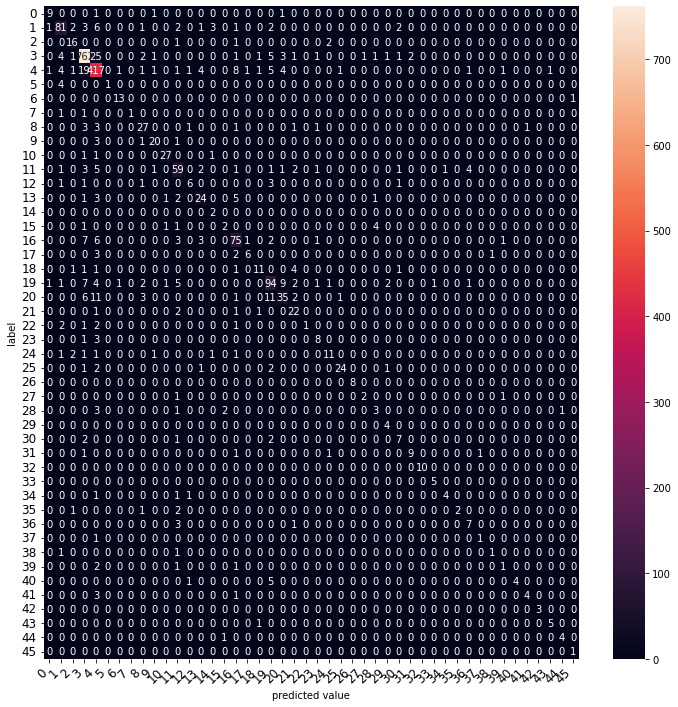

In [129]:
graph_confusion_matrix(voting_classifier, tfidfv_test, y_test)

# 회고

### 코드 진행에서 많이 시간이 걸렸다. 그래도 8가지 모델을 모두 수행할 수 있었다.  F-score도 0.8이상으로 준수한 수치가 나왔고 만족스러웠다. RNN모델을 구현했는데, Accuraccy가 생각보다 높지 않아서 아쉽다.